# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
# Your code here

df = pd.read_csv('data_all.zip', nrows=75000)



In [3]:

df.head()


,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:

df.dtypes


e      float64
1      float64
2      float64
3      float64
4      float64
5      float64
6      float64
7      float64
8      float64
9      float64
10     float64
11     float64
12     float64
13     float64
14     float64
15     float64
16     float64
17     float64
18     float64
19     float64
20     float64
21     float64
22     float64
23     float64
24     float64
25     float64
26     float64
27     float64
28     float64
29     float64
        ...   
755    float64
756    float64
757    float64
758    float64
759    float64
760    float64
761    float64
762    float64
763    float64
764    float64
765    float64
766    float64
767    float64
768    float64
769    float64
770    float64
771    float64
772    float64
773    float64
774    float64
775    float64
776    float64
777    float64
778    float64
779    float64
780    float64
781    float64
782    float64
783    float64
784    float64
Length: 785, dtype: object

In [5]:

data = df.values
data.shape


(75000, 785)

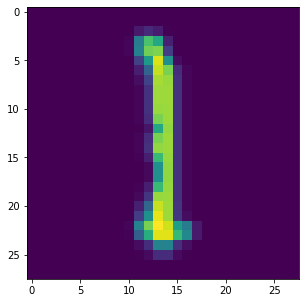

In [6]:

plt.figure(figsize=(5,5))
plt.imshow(data[12,1:].reshape(28,28))  #para mostrar pixeles
plt.show()


In [7]:
alfabeto={0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9',
          10:'A', 11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J',
          20:'K', 21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T',
          30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z',
          36:'a', 37:'b', 38:'c', 39:'d', 40:'e', 41:'f', 42:'g', 43:'h', 44:'i', 45:'j',
          46:'k', 47:'l', 48:'m', 49:'n', 50:'o', 51:'p', 52:'q', 53:'r', 54:'s', 55:'t',
          56:'u', 57:'v', 58:'w', 59:'x', 60:'y', 61:'z'}

In [8]:
upper=df.loc[(df.e>=10) & (df.e<36)]
upper.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
upper_data=upper.values
upper_data.shape

(20136, 785)

In [10]:
X=upper_data[:,1:]/255
y=upper_data[:,0]

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train.shape


(16108, 784)

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [12]:
rf=RandomForestClassifier(n_estimators=1000, max_depth=5).fit(X_train, y_train)


In [13]:
classification_report(y_test, rf.predict(X_test))


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n        10.0       0.59      0.67      0.62       127\n        11.0       1.00      0.01      0.03        76\n        12.0       0.62      0.87      0.72       245\n        13.0       1.00      0.02      0.04       108\n        14.0       0.82      0.18      0.30        99\n        15.0       0.77      0.57      0.66       182\n        16.0       0.00      0.00      0.00        58\n        17.0       0.00      0.00      0.00        78\n        18.0       0.52      0.89      0.66       260\n        19.0       0.00      0.00      0.00        89\n        20.0       0.00      0.00      0.00        41\n        21.0       0.65      0.20      0.31        98\n        22.0       0.73      0.93      0.82       170\n        23.0       0.57      0.72      0.64       194\n        24.0       0.68      0.94      0.79       539\n        25.0       0.66      0.81      0.73       177\n        26.0       0.00      0.00      0.00        58\n       

* Try to do the same thing with lowercases.

In [14]:
# Your code here

lower=df.loc[df.e>35]
lower.head()


,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:

lower_data=lower.values
lower_data.shape


(17400, 785)

In [ ]:

X=lower_data[:,1:]/255
y=lower_data[:,0]


In [16]:

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train.shape


(16108, 784)

In [17]:

svc=SVC(gamma='auto').fit(X_train, y_train)


In [18]:

classification_report(y_test, svc.predict(X_test))


'              precision    recall  f1-score   support\n\n        10.0       0.75      0.85      0.80       137\n        11.0       0.83      0.79      0.81        76\n        12.0       0.87      0.91      0.89       243\n        13.0       0.88      0.67      0.76        97\n        14.0       0.85      0.75      0.80       104\n        15.0       0.80      0.83      0.81       204\n        16.0       0.85      0.66      0.74        50\n        17.0       0.85      0.60      0.71        78\n        18.0       0.77      0.94      0.85       244\n        19.0       0.80      0.69      0.74        75\n        20.0       0.88      0.55      0.67        51\n        21.0       0.93      0.92      0.93       101\n        22.0       0.89      0.93      0.91       188\n        23.0       0.73      0.82      0.77       180\n        24.0       0.89      0.97      0.93       552\n        25.0       0.83      0.88      0.85       170\n        26.0       0.92      0.59      0.72        56\n       

In [19]:

from sklearn.naive_bayes import GaussianNB as GNB

gnb=GNB()

gnb.fit(X_train, y_train)

train_score=gnb.score(X_train, y_train) # Accuracy
test_score=gnb.score(X_test, y_test)

print ('train Acc:',train_score, '-- test Acc:', test_score)


train Acc: 0.5301092624782716 -- test Acc: 0.5114200595829196


In [20]:

from sklearn.naive_bayes import MultinomialNB as MNB
mnb=MNB()

mnb.fit(X_train, y_train)

train_score=mnb.score(X_train, y_train) # Accuracy
test_score=mnb.score(X_test, y_test)

print ('train Acc:',train_score, '-- test Acc:', test_score)


train Acc: 0.7009560466848771 -- test Acc: 0.698857994041708


* Try to do the same thing with numbers.

In [21]:
# Your code here

number=df.loc[df.e<10]
number.head()


,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:

number_data=number.values
number_data.shape


(37464, 785)

In [23]:

X=number_data[:,1:]/255
y=number_data[:,0]


In [24]:

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train.shape


(29971, 784)

In [25]:

logreg=LogisticRegression(C=0.01, penalty='l2', tol=0.0001, max_iter=70, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)


/home/miguel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:

classification_report(y_test, logreg.predict(X_test))


'              precision    recall  f1-score   support\n\n         0.0       0.94      0.96      0.95       716\n         1.0       0.96      0.97      0.96       813\n         2.0       0.96      0.91      0.93       801\n         3.0       0.95      0.92      0.93       801\n         4.0       0.90      0.91      0.91       712\n         5.0       0.87      0.87      0.87       662\n         6.0       0.94      0.97      0.95       726\n         7.0       0.94      0.96      0.95       806\n         8.0       0.91      0.87      0.89       730\n         9.0       0.87      0.91      0.89       726\n\n    accuracy                           0.93      7493\n   macro avg       0.92      0.92      0.92      7493\nweighted avg       0.93      0.93      0.93      7493\n'